### **Import Libraries**

Ensure that all the necessary libraries are imported.

In [1]:
import os  # Handles file and directory operations.
import numpy as np  # Supports array operations and numerical computations.
import matplotlib.pyplot as plt  # Enables data visualization through plots and charts.
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets.
from keras.models import Sequential  # Builds a linear stack of neural network layers.
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D  # Provides essential layers for constructing a CNN.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Performs real-time data augmentation for images.
from keras.utils import to_categorical  # Converts class labels to one-hot encoded vectors.
from keras.preprocessing import image  # Loads and preprocesses images for model input.
import cv2  # Offers tools for image and video processing (OpenCV).
import pandas as pd  # Manages and analyzes structured data in DataFrames.
import seaborn as sns  # Creates advanced visualizations with a focus on statistical graphics.

### **Mounting the google drive**

In [2]:
# Import the drive module from google.colab to interact with Google Drive
from google.colab import drive

# Mount the Google Drive to the '/content/drive' directory
# This will prompt to authenticate and provide access to Google Drive files
drive.mount('/content/drive')

Mounted at /content/drive


### **Load and Preprocess Images**

In [4]:
# Define the path to the training dataset directory.
data_dir_train = '/content/drive/MyDrive/Data/FinalProject/Dataset/train'

# Define the path to the testing dataset directory.
data_dir_test = '/content/drive/MyDrive/Data/FinalProject/Dataset/test'

# Define the list of emotion labels corresponding to different emotions.
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Function to load images from the specified directory and their corresponding labels.
def load_images(data_dir, emotion_labels):
    images = []  # Initialize an empty list to store images.
    labels = []  # Initialize an empty list to store labels.

    # Loop through each label in the emotion_labels list.
    for label in emotion_labels:
        # Construct the path to the directory containing images for the current label.
        img_dir = os.path.join(data_dir, label)

        # Check if the directory exists; if not, print a message and continue to the next label.
        if not os.path.exists(img_dir):
            print(f"Directory {img_dir} does not exist")
            continue

        # Loop through each image file in the directory.
        for img_name in os.listdir(img_dir):
            img_path = os.path.join(img_dir, img_name)  # Construct the full path to the image.

            try:
                # Load the image with a target size of 48x48 pixels and grayscale mode.
                img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')

                # Convert the loaded image to a NumPy array.
                img = image.img_to_array(img)

                # Convert the grayscale image to RGB by repeating the grayscale values across the three color channels.
                img = np.repeat(img, 3, axis=-1)

                # Normalize the pixel values to the range [0, 1].
                img = img / 255.0

                # Append the processed image to the images list.
                images.append(img)

                # Append the corresponding label index to the labels list.
                labels.append(emotion_labels.index(label))

            # Handle exceptions during image loading and print the error message.
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    # Return the images and labels as NumPy arrays.
    return np.array(images), np.array(labels)

# Load the training dataset images and their labels.
X_train, y_train = load_images(data_dir_train, emotion_labels)

# Load the testing dataset images and their labels.
X_test, y_test = load_images(data_dir_test, emotion_labels)

# Ensure labels are one-hot encoded for use in training models.
y_train = to_categorical(y_train, num_classes=len(emotion_labels))
y_test = to_categorical(y_test, num_classes=len(emotion_labels))


### **Explore and Visualize Data**

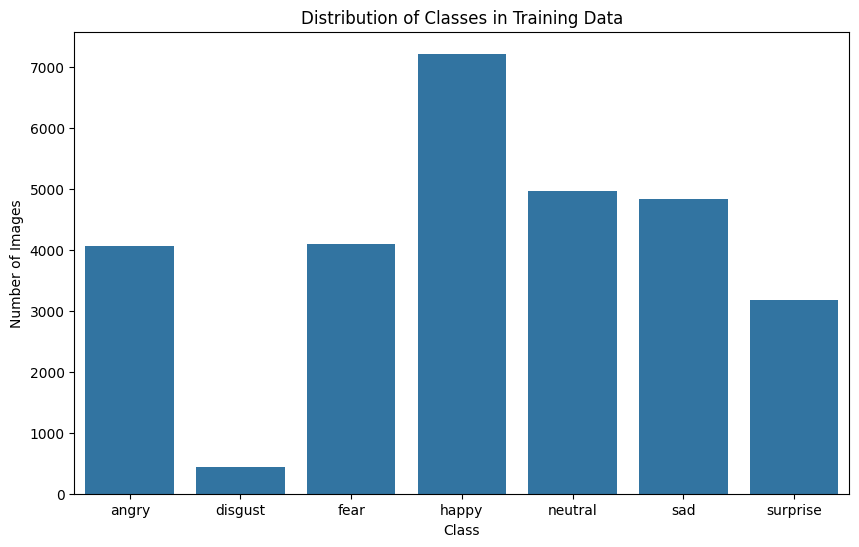

In [5]:
import pandas as pd  # Import the pandas library for data manipulation.

# Create a DataFrame from the labels, mapping one-hot encoded labels back to their original emotion names.
labels_df = pd.DataFrame({'label': [emotion_labels[label] for label in np.argmax(y_train, axis=1)]})

# Set up the plot with a specified figure size.
plt.figure(figsize=(10, 6))

# Create a count plot to visualize the distribution of classes in the training data.
# 'order=emotion_labels' ensures that the x-axis labels are displayed in the correct order.
sns.countplot(x='label', data=labels_df, order=emotion_labels)

# Add a title to the plot.
plt.title('Distribution of Classes in Training Data')

# Label the x-axis.
plt.xlabel('Class')

# Label the y-axis.
plt.ylabel('Number of Images')

# Ensure the x-axis labels are properly aligned with the class labels.
plt.xticks(ticks=np.arange(len(emotion_labels)), labels=emotion_labels)

# Display the plot.
plt.show()

### **Sample Images: Displays a few images from each class.**

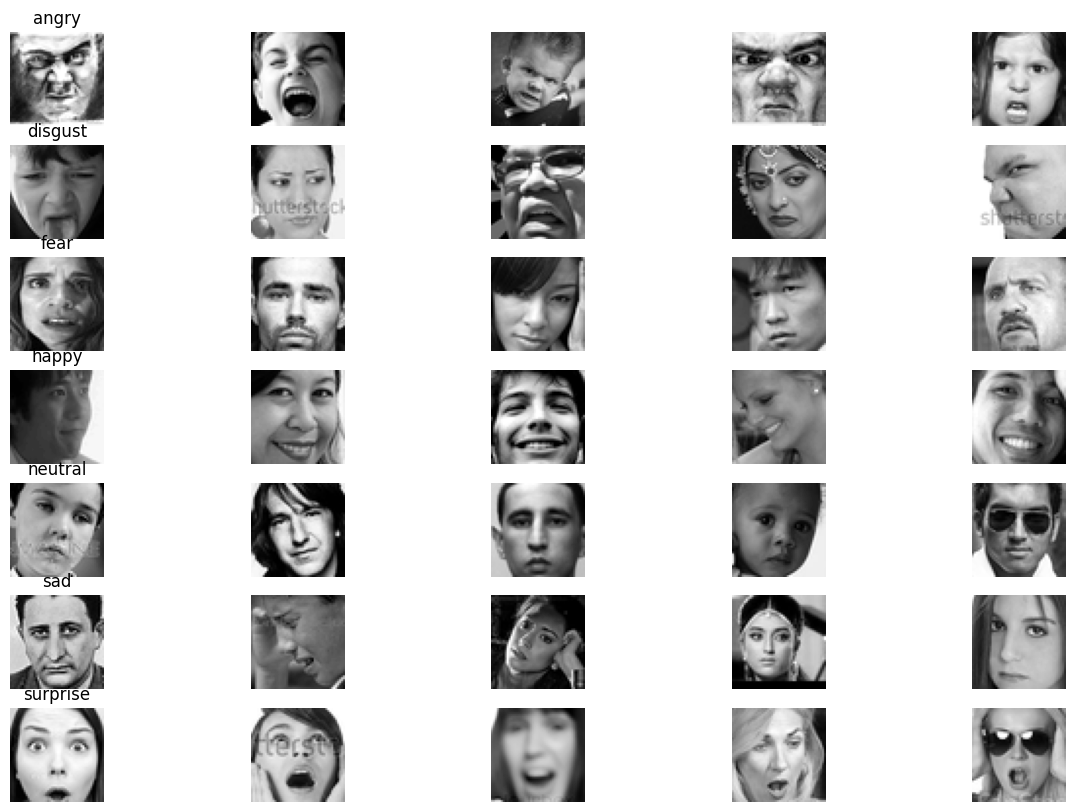

In [6]:
def display_sample_images(X, y, emotion_labels, num_samples=5):
    """
    Display a grid of sample images for each emotion label.

    Parameters:
    X : numpy array
        Array containing the image data.
    y : numpy array
        Array containing the one-hot encoded labels.
    emotion_labels : list
        List of emotion labels corresponding to the classes.
    num_samples : int, optional
        Number of sample images to display for each emotion (default is 5).
    """
    plt.figure(figsize=(15, 10))  # Set the size of the figure.

    # Loop through each emotion label.
    for i, label in enumerate(emotion_labels):
        # Find the indices of images corresponding to the current label.
        label_indices = np.where(np.argmax(y, axis=1) == i)[0]

        # Randomly select a specified number of images from the current label.
        sample_indices = np.random.choice(label_indices, num_samples, replace=False)

        # Loop through the selected images and display them.
        for j, idx in enumerate(sample_indices):
            # Create a subplot for each image.
            plt.subplot(len(emotion_labels), num_samples, i*num_samples + j + 1)

            # Convert the RGB image to grayscale by averaging the color channels.
            gray_image = np.mean(X[idx], axis=-1)

            # Display the grayscale image.
            plt.imshow(gray_image, cmap='gray')

            # Remove the axis for a cleaner display.
            plt.axis('off')

            # Add a title with the label name to the first image in each row.
            if j == 0:
                plt.title(label)

    # Display the complete grid of images.
    plt.show()

# Call the function to display sample images from the training dataset.
display_sample_images(X_train, y_train, emotion_labels)

### **Image Dimensions: Verifies the dimensions of the images.**

In [7]:
print(f"Image shape: {X_train[0].shape}")

Image shape: (48, 48, 3)


### **Mean and Standard Deviation of Pixel Values: Provides statistics on the pixel values.**

In [8]:
# Calculate the mean pixel value across all images in the training dataset.
mean_pixel_value = np.mean(X_train)

# Calculate the standard deviation of pixel values across all images in the training dataset.
std_pixel_value = np.std(X_train)

# Print out the calculated mean pixel value.
print(f"Mean pixel value: {mean_pixel_value}")

# Print out the calculated standard deviation of pixel values.
print(f"Standard deviation of pixel values: {std_pixel_value}")

Mean pixel value: 0.5077813863754272
Standard deviation of pixel values: 0.25497347116470337


### **Image Intensity Distribution: Displays the intensity distribution of a sample image.**

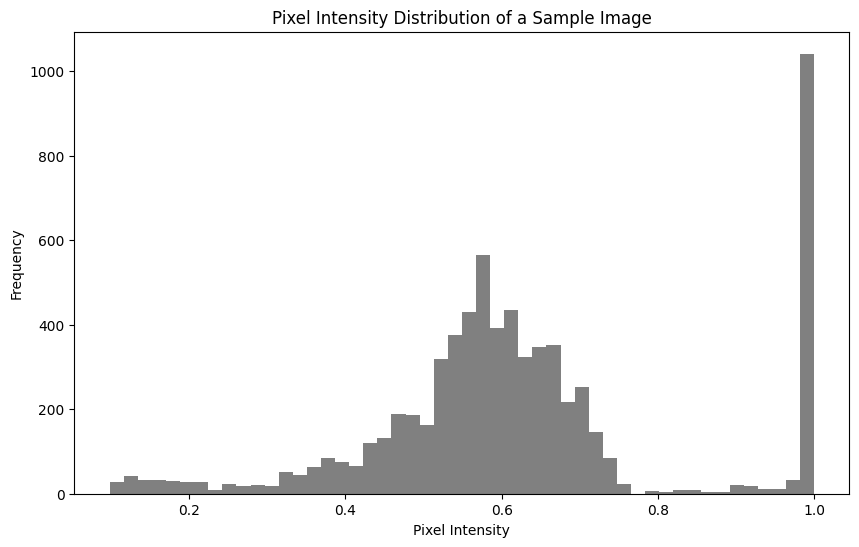

In [9]:
# Set up the figure size for the plot.
plt.figure(figsize=(10, 6))

# Create a histogram of pixel intensities for the first image in the training dataset.
# 'flatten()' converts the 2D image array into a 1D array of pixel values.
plt.hist(X_train[0].flatten(), bins=50, color='gray')

# Add a title to the histogram.
plt.title('Pixel Intensity Distribution of a Sample Image')

# Label the x-axis to indicate it represents pixel intensity values.
plt.xlabel('Pixel Intensity')

# Label the y-axis to indicate it represents the frequency of each intensity value.
plt.ylabel('Frequency')

# Display the histogram.
plt.show()

### **Augmentation Examples: Shows examples of augmented images.**

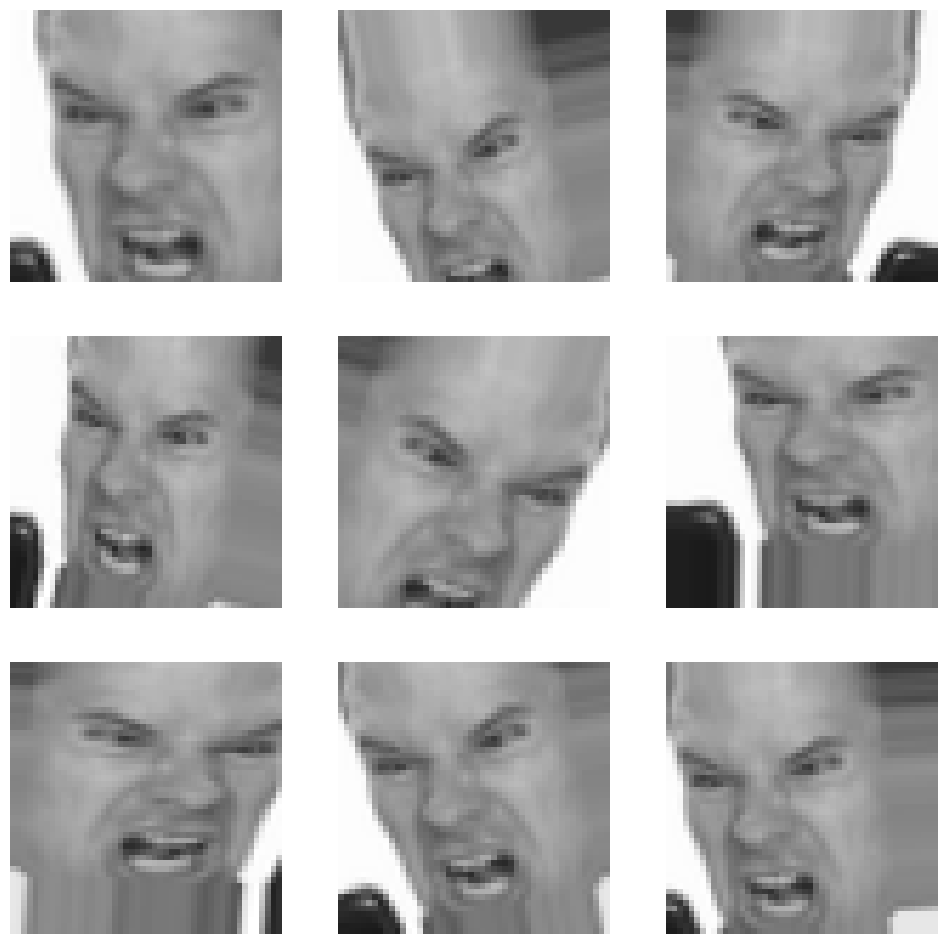

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the data augmentation generator with various transformations.
datagen = ImageDataGenerator(
    rotation_range=20,          # Rotate images randomly by up to 20 degrees.
    width_shift_range=0.2,      # Shift images horizontally by up to 20% of the width.
    height_shift_range=0.2,     # Shift images vertically by up to 20% of the height.
    shear_range=0.2,            # Apply random shearing transformations.
    zoom_range=0.2,             # Apply random zooming within the specified range.
    horizontal_flip=True,       # Randomly flip images horizontally.
    fill_mode='nearest'         # Fill in pixels that may have been lost after a transformation.
)

# Prepare a single image from the training set for augmentation by reshaping it for the generator.
# The image is reshaped to (1, 48, 48, 3) to indicate a single RGB image with 48x48 pixels.
sample_image = X_train[0].reshape(1, 48, 48, 3)

# Create an iterator that will generate augmented images from the sample image.
aug_iter = datagen.flow(sample_image)

# Set up a figure for displaying the augmented images.
plt.figure(figsize=(12, 12))

# Generate and display 9 augmented images.
for i in range(9):
    plt.subplot(3, 3, i+1)  # Arrange the images in a 3x3 grid.
    batch = next(aug_iter)  # Generate the next batch of augmented images.
    image_augmented = batch[0]  # Extract the first (and only) image from the batch.
    plt.imshow(image_augmented)  # Display the augmented image.
    plt.axis('off')  # Turn off axis labels for a cleaner look.

# Show the figure with the augmented images.
plt.show()

### **Correlation Matrix of Pixel Values: Visualizes the correlation between pixel values in a sample image.**

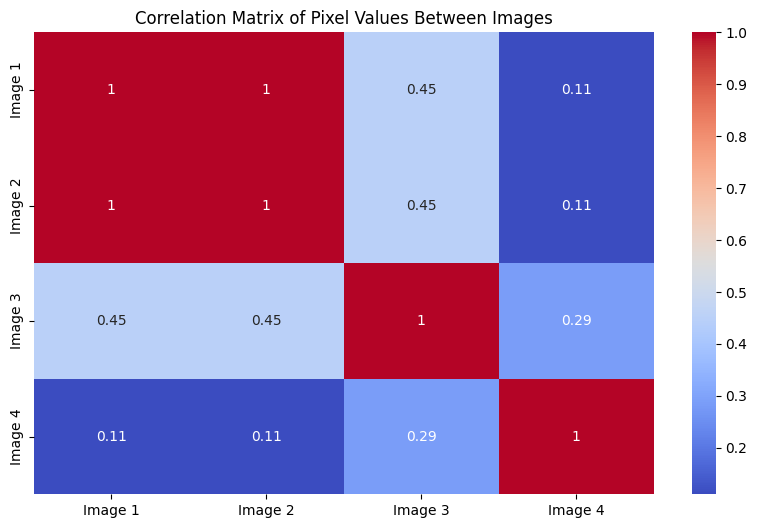

In [11]:
# Select a few images from the training set and convert each to grayscale and flatten.
# The flattening process converts the 2D image arrays into 1D arrays of pixel values.
images = [np.mean(X_train[i], axis=-1).flatten() for i in range(4)]

# Calculate the correlation matrix between these flattened grayscale images.
# The correlation matrix will show how similar the pixel intensity patterns are between the selected images.
correlation_matrix = np.corrcoef(images)

# Set up the figure size for the correlation matrix heatmap.
plt.figure(figsize=(10, 6))

# Plot the correlation matrix as a heatmap using seaborn.
# 'annot=True' displays the correlation coefficients on the heatmap.
# 'cmap="coolwarm"' sets the color scheme, with 'cool' colors for negative correlations and 'warm' colors for positive correlations.
# 'xticklabels' and 'yticklabels' label the axes with the corresponding image numbers.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            xticklabels=['Image 1', 'Image 2', 'Image 3', 'Image 4'],
            yticklabels=['Image 1', 'Image 2', 'Image 3', 'Image 4'])

# Add a title to the heatmap.
plt.title('Correlation Matrix of Pixel Values Between Images')

# Display the heatmap.
plt.show()

### **Class Distribution in Training and Testing Sets: Compare class distributions between training and testing datasets.**

<ipython-input-12-2b5a0d2ea6fa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=labels_df_train, palette='viridis')


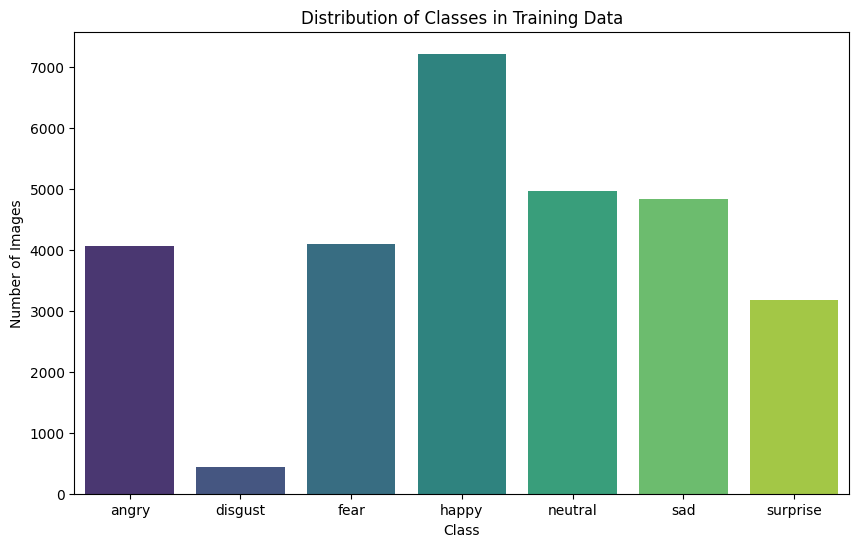

<ipython-input-12-2b5a0d2ea6fa>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=labels_df_test, palette='magma')


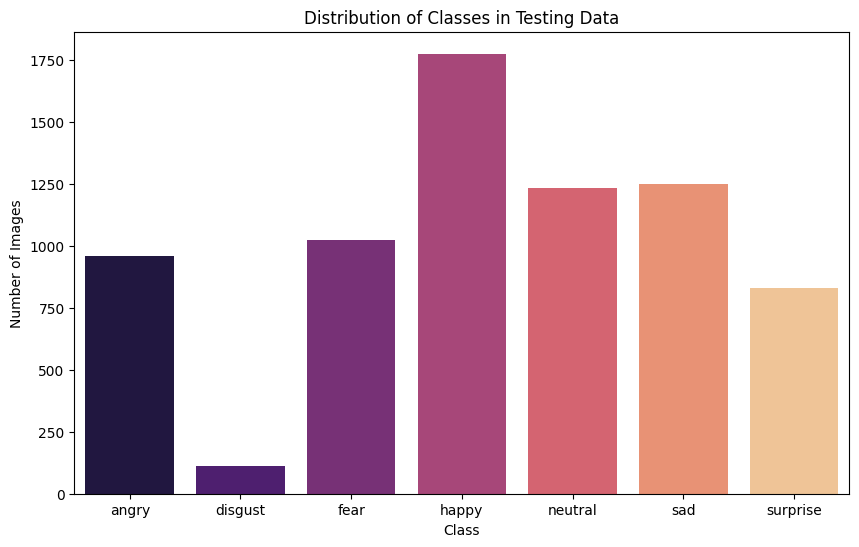

In [12]:
# Convert one-hot encoded labels back to categorical form for both training and testing data.
# This is done by finding the index of the maximum value along the second axis (axis=1) for each label.
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Create DataFrames to hold the categorical labels for easier visualization.
labels_df_train = pd.DataFrame({'label': y_train_labels})
labels_df_test = pd.DataFrame({'label': y_test_labels})

# Plot the distribution of classes in the training data.
plt.figure(figsize=(10, 6))  # Set up the figure size.
sns.countplot(x='label', data=labels_df_train, palette='viridis')  # Create a count plot with a 'viridis' color palette.
plt.title('Distribution of Classes in Training Data')  # Add a title to the plot.
plt.xlabel('Class')  # Label the x-axis.
plt.ylabel('Number of Images')  # Label the y-axis.
plt.xticks(ticks=np.arange(len(emotion_labels)), labels=emotion_labels)  # Set the x-axis tick labels to the emotion labels.
plt.show()  # Display the plot.

# Plot the distribution of classes in the testing data.
plt.figure(figsize=(10, 6))  # Set up the figure size.
sns.countplot(x='label', data=labels_df_test, palette='magma')  # Create a count plot with a 'magma' color palette.
plt.title('Distribution of Classes in Testing Data')  # Add a title to the plot.
plt.xlabel('Class')  # Label the x-axis.
plt.ylabel('Number of Images')  # Label the y-axis.
plt.xticks(ticks=np.arange(len(emotion_labels)), labels=emotion_labels)  # Set the x-axis tick labels to the emotion labels.
plt.show()  # Display the plot.

### **Principal Component Analysis (PCA): Visualize the data in 2D using PCA.**

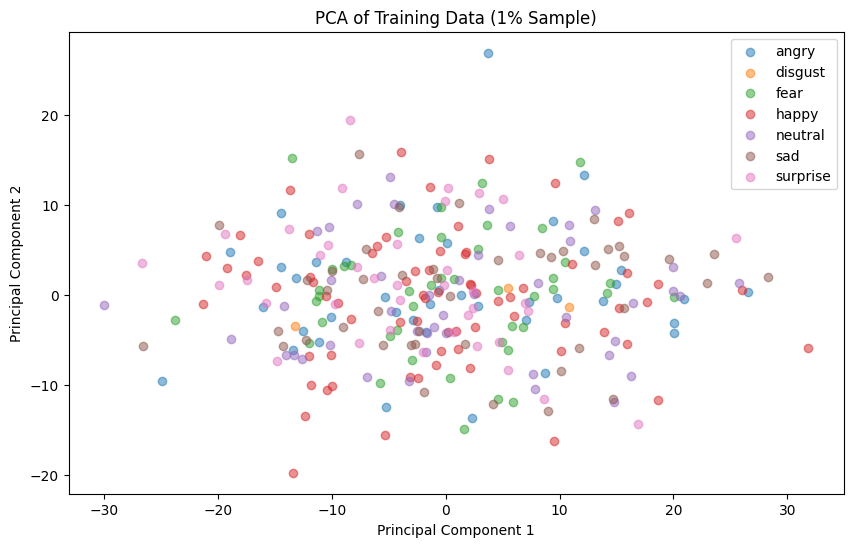

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Flatten the images in the training dataset.
# This reshapes each image from 3D (height, width, channels) to 1D (a single vector of pixel values).
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Sample a smaller subset of the training data, specifically 1% of the dataset.
sample_size = int(0.01 * X_train.shape[0])  # Calculate 1% of the total number of images.
indices = np.random.choice(X_train.shape[0], sample_size, replace=False)  # Randomly select sample_size indices without replacement.
X_train_sample = X_train_flat[indices]  # Select the images corresponding to the sampled indices.
y_train_sample = y_train_labels[indices]  # Select the labels corresponding to the sampled indices.

# Apply Principal Component Analysis (PCA) to reduce the dimensionality of the sampled data to 2 components.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_sample)

# Plot the results of the PCA.
plt.figure(figsize=(10, 6))  # Set up the figure size.

# Loop through each emotion label and plot the corresponding points in the PCA-transformed space.
for i, label in enumerate(emotion_labels):
    indices = np.where(y_train_sample == i)[0]  # Find the indices of the samples belonging to the current label.
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=label, alpha=0.5)  # Plot the points with some transparency (alpha=0.5).

# Add a title to the plot.
plt.title('PCA of Training Data (1% Sample)')

# Label the x-axis and y-axis to indicate the principal components.
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend to the plot to identify the emotion labels.
plt.legend()

# Display the plot.
plt.show()

### **Average Image for Each Class: Compute and visualize the average image for each class.**

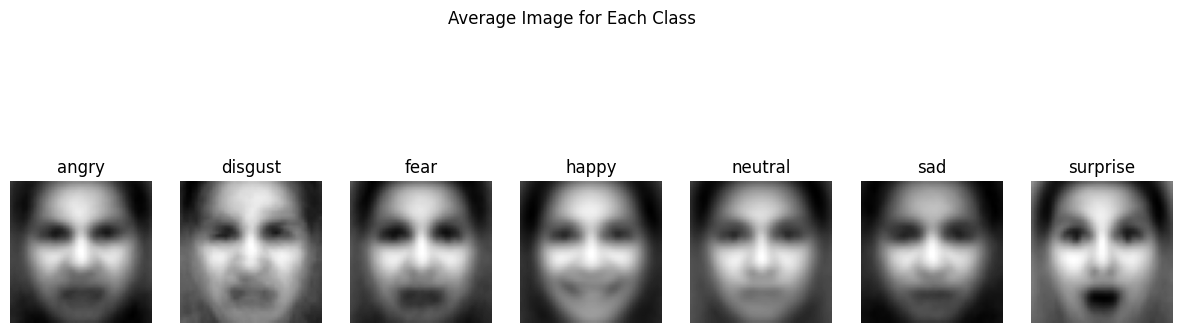

In [14]:
import cv2  # Import the OpenCV library for image processing.

def calculate_average_image(images):
    """
    Calculate the average image from a set of images.

    Parameters:
    images : numpy array
        Array containing the images.

    Returns:
    numpy array
        The average image.
    """
    return np.mean(images, axis=0)  # Compute the mean of the images along the first axis.

# Set up the figure for displaying the average images of each class.
plt.figure(figsize=(15, 5))

# Loop through each emotion label.
for i, label in enumerate(emotion_labels):
    # Find the indices of the images corresponding to the current label.
    indices = np.where(y_train_labels == i)[0]

    # Skip this label if there are no images associated with it.
    if len(indices) == 0:
        print(f"Skipping class '{label}' due to no images.")
        continue

    # Calculate the average image for the current label.
    avg_image = calculate_average_image(X_train[indices])

    # Convert the average image to grayscale by averaging the color channels.
    avg_image_gray = np.mean(avg_image, axis=-1)

    # Normalize the grayscale image to the range [0, 1].
    avg_image_gray = (avg_image_gray - np.min(avg_image_gray)) / (np.max(avg_image_gray) - np.min(avg_image_gray))

    # Enhance the contrast of the image using contrast stretching with OpenCV's normalize function.
    avg_image_gray = cv2.normalize(avg_image_gray, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    # Plot the average image in the current subplot.
    plt.subplot(1, len(emotion_labels), i + 1)
    plt.imshow(avg_image_gray, cmap='gray')  # Display the image in grayscale.
    plt.axis('off')  # Turn off axis labels for a cleaner look.
    plt.title(label)  # Add the label as the title of the subplot.

# Add a title for the entire figure.
plt.suptitle("Average Image for Each Class")

# Display the figure with all the average images.
plt.show()

In [15]:
from sklearn.utils import class_weight  # Import the class_weight module from sklearn to handle class imbalance.

# Calculate class weights to handle imbalanced classes in the dataset.
# 'class_weight="balanced"' ensures that the weights are inversely proportional to the class frequencies.
# 'classes=np.unique(np.argmax(y_train, axis=1))' provides the unique class labels in the training data.
# 'y=np.argmax(y_train, axis=1)' converts the one-hot encoded labels back to categorical form.
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(np.argmax(y_train, axis=1)),
                                                  y=np.argmax(y_train, axis=1))

# Convert the class weights array to a dictionary where the keys are class labels and values are the corresponding weights.
class_weights = dict(enumerate(class_weights))

In [16]:
from tensorflow.keras.applications import VGG16  # Import the VGG16 model from Keras applications.
from tensorflow.keras.optimizers import Adam  # Import the Adam optimizer from Keras.

# Load the VGG16 model pre-trained on the ImageNet dataset, excluding the fully connected layers at the top.
# 'include_top=False' means the model is loaded without the top fully connected layers, allowing us to add our own.
# 'input_shape=(48, 48, 3)' specifies the input size for the model, matching the dimensions of our dataset.
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Fine-tune only the last few layers of the VGG16 model.
# Loop through the layers of VGG16, setting the 'trainable' attribute to False for all but the last four layers.
for layer in vgg16.layers[:-4]:  # Only the last four layers will remain trainable.
    layer.trainable = False  # Freeze the layers, so their weights are not updated during training.

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### ***Loading and Preprocessing the Dataset***

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping  # Import callbacks for learning rate adjustment and early stopping.
from tensorflow.keras.applications import VGG16  # Import the VGG16 model from Keras applications.
from tensorflow.keras.optimizers import Adam  # Import the Adam optimizer from Keras.

# Load the VGG16 model pre-trained on ImageNet without the top fully connected layers.
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Fine-tune the last few layers of the VGG16 model.
# Freeze all layers except for the last four by setting 'trainable' to False.
for layer in vgg16.layers[:-4]:
    layer.trainable = False

# Create a Sequential model and add the VGG16 base model.
model = Sequential()
model.add(vgg16)

# Add a Flatten layer to convert the 3D feature maps to 1D feature vectors.
model.add(Flatten())

# Add a fully connected Dense layer with 256 units and ReLU activation.
model.add(Dense(256, activation='relu'))

# Add a Dropout layer with a dropout rate of 0.5 to prevent overfitting.
model.add(Dropout(0.5))

# Add a final Dense layer with the number of units equal to the number of emotion classes and softmax activation for multi-class classification.
model.add(Dense(len(emotion_labels), activation='softmax'))

# Compile the model with the Adam optimizer, using a low learning rate, categorical cross-entropy loss, and accuracy as a metric.
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data augmentation using ImageDataGenerator to artificially increase the diversity of the training data.
datagen = ImageDataGenerator(
    rotation_range=30,           # Randomly rotate images by up to 30 degrees.
    zoom_range=0.2,              # Randomly zoom into images by up to 20%.
    width_shift_range=0.1,       # Randomly shift images horizontally by up to 10% of the width.
    height_shift_range=0.1,      # Randomly shift images vertically by up to 10% of the height.
    horizontal_flip=True,        # Randomly flip images horizontally.
    fill_mode='nearest'          # Fill any missing pixels after transformations using the nearest pixels.
)

# Create generators for training and validation data with a batch size of 64.
train_generator = datagen.flow(X_train, y_train, batch_size=64)
validation_generator = datagen.flow(X_test, y_test, batch_size=64)

# Set up callbacks for training:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
# Reduce the learning rate by a factor of 0.2 if the validation loss doesn't improve for 5 epochs, with a minimum learning rate of 0.00001.

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Stop training early if the validation loss doesn't improve for 10 epochs, and restore the model weights from the best epoch.

# Train the model using the training generator and validate using the validation generator.
# The training process will run for up to 50 epochs, with callbacks for learning rate reduction and early stopping.
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.2801 - loss: 1.7868 - val_accuracy: 0.3905 - val_loss: 1.5581 - learning_rate: 1.0000e-04
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.3988 - loss: 1.5533 - val_accuracy: 0.4299 - val_loss: 1.4815 - learning_rate: 1.0000e-04
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.4409 - loss: 1.4698 - val_accuracy: 0.4677 - val_loss: 1.3981 - learning_rate: 1.0000e-04
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.4605 - loss: 1.4185 - val_accuracy: 0.4731 - val_loss: 1.3727 - learning_rate: 1.0000e-04
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.4755 - loss: 1.3883 - val_accuracy: 0.4763 - val_loss: 1.3767 - learning_rate: 1.0000e-04
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.4929 - loss: 1.3478 - val_accuracy: 0.4923 - val_loss: 1.3300 - learning_rate: 1.0000e-04
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accurac

In [18]:
# Save the model
model.save('emotion_detection_model_vgg16.h5')

In [19]:
# Evaluate the model on the validation data using the validation generator.
# This returns the loss and accuracy metrics on the validation set.
loss, accuracy = model.evaluate(validation_generator)

# Print the loss value to see how well the model is performing on the validation set.
print(f'Loss: {loss}')

# Print the accuracy value to see the percentage of correctly classified images on the validation set.
print(f'Accuracy: {accuracy}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.5637 - loss: 1.2244
Loss: 1.2353339195251465
Accuracy: 0.5589300394058228


### **Training and validation accuracy and loss over the epochs**

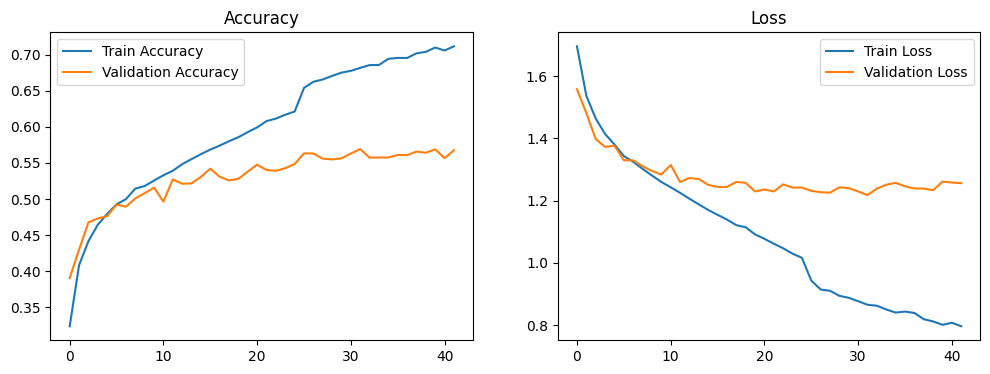

In [21]:
# Plot the training and validation accuracy and loss over the epochs.

# Set up the figure with two subplots, side by side.
plt.figure(figsize=(12, 4))

# Plot the training and validation accuracy on the first subplot.
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy.
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy.
plt.legend()  # Display a legend to distinguish between training and validation accuracy.
plt.title('Accuracy')  # Add a title to the accuracy plot.

# Plot the training and validation loss on the second subplot.
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')  # Plot training loss.
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss.
plt.legend()  # Display a legend to distinguish between training and validation loss.
plt.title('Loss')  # Add a title to the loss plot.

# Display the plots.
plt.show()

In [22]:
# Use the trained model to make predictions on the test data.
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels by taking the index of the maximum value in each prediction.
predicted_classes = np.argmax(predictions, axis=1)

# Convert the true one-hot encoded labels of the test data back to categorical form by taking the index of the maximum value in each label.
true_classes = np.argmax(y_test, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


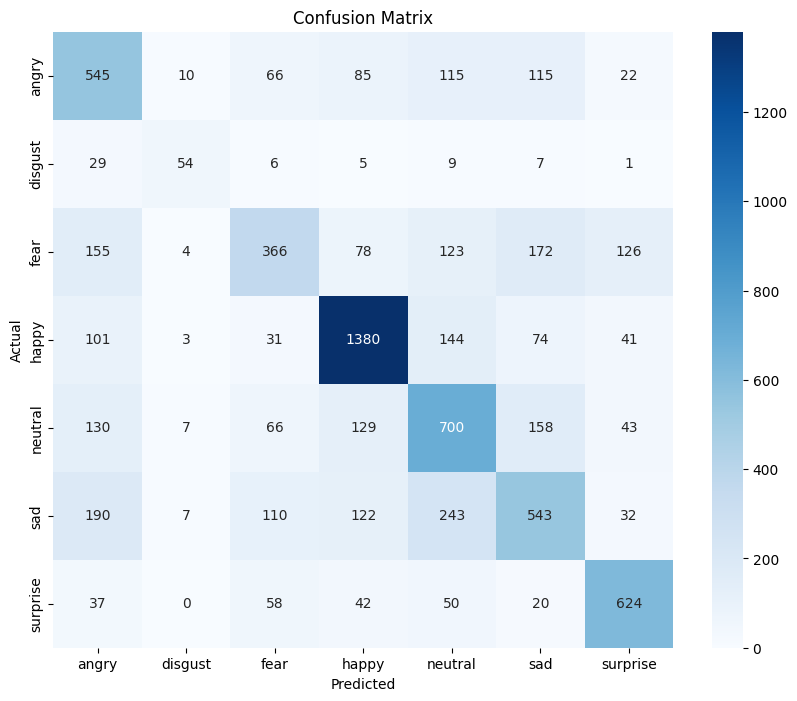

In [23]:
from sklearn.metrics import confusion_matrix  # Import the confusion_matrix function from sklearn.
import seaborn as sns  # Import seaborn for easier visualization of the confusion matrix.
import matplotlib.pyplot as plt  # Import matplotlib for plotting.

# Calculate the confusion matrix to compare the predicted classes with the true classes.
cm = confusion_matrix(true_classes, predicted_classes)

# Set up the figure for displaying the confusion matrix.
plt.figure(figsize=(10, 8))

# Plot the confusion matrix as a heatmap.
# 'annot=True' adds the count annotations on the heatmap.
# 'fmt="d"' ensures that the annotations are displayed as integers.
# 'cmap="Blues"' sets the color scheme for the heatmap.
# 'xticklabels' and 'yticklabels' set the labels on the x and y axes to the emotion labels.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)

# Label the x-axis as 'Predicted'.
plt.xlabel('Predicted')

# Label the y-axis as 'Actual'.
plt.ylabel('Actual')

# Add a title to the confusion matrix.
plt.title('Confusion Matrix')

# Display the plot.
plt.show()

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score  # Import metrics for model evaluation.

# Calculate the precision for each class.
# 'average=None' returns the precision for each class separately rather than averaging them.
precision = precision_score(true_classes, predicted_classes, average=None)

# Calculate the recall for each class.
recall = recall_score(true_classes, predicted_classes, average=None)

# Calculate the F1-score for each class.
f1 = f1_score(true_classes, predicted_classes, average=None)

# Print the precision, recall, and F1-score for each emotion class.
for idx, label in enumerate(emotion_labels):
    print(f"{label} - Precision: {precision[idx]:.2f}, Recall: {recall[idx]:.2f}, F1-Score: {f1[idx]:.2f}")
    # .2f formats the values to two decimal places for readability.

angry - Precision: 0.46, Recall: 0.57, F1-Score: 0.51
disgust - Precision: 0.64, Recall: 0.49, F1-Score: 0.55
fear - Precision: 0.52, Recall: 0.36, F1-Score: 0.42
happy - Precision: 0.75, Recall: 0.78, F1-Score: 0.76
neutral - Precision: 0.51, Recall: 0.57, F1-Score: 0.53
sad - Precision: 0.50, Recall: 0.44, F1-Score: 0.46
surprise - Precision: 0.70, Recall: 0.75, F1-Score: 0.73


### **Prediction of images from Test data**

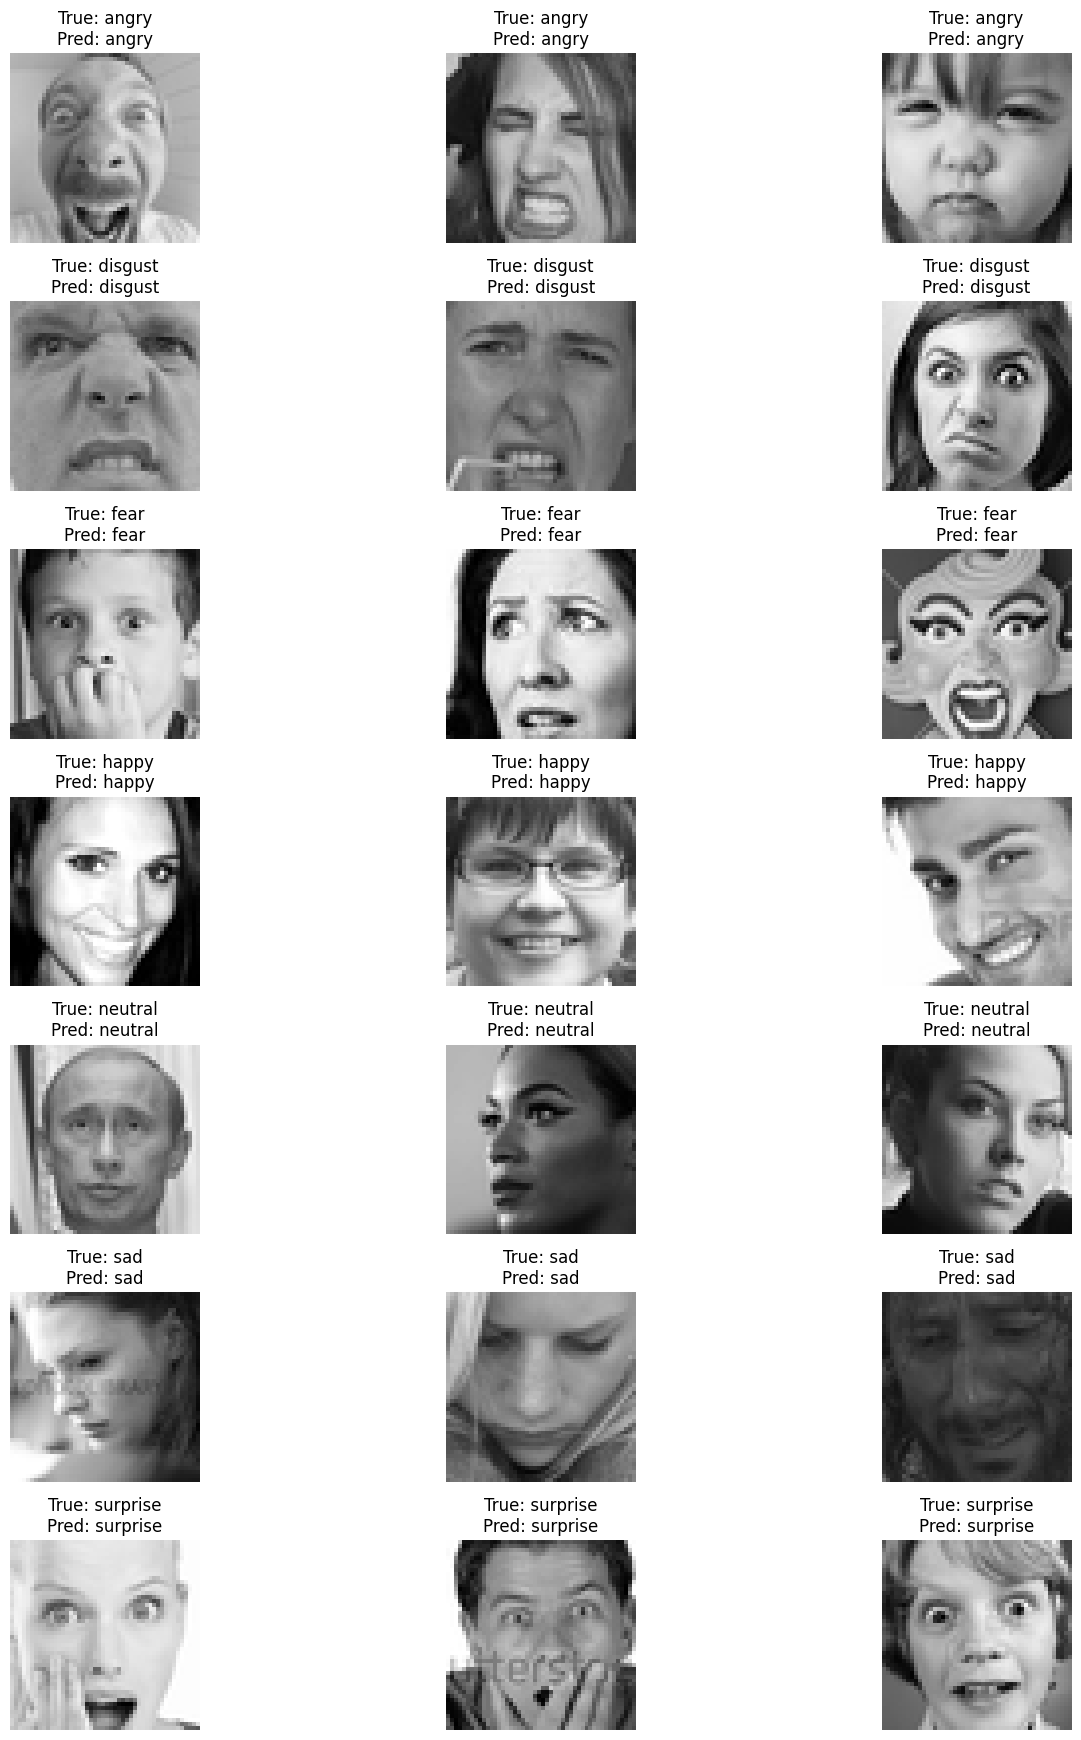

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(images, true_labels, predicted_labels, emotion_labels, num_images_per_class=3):
    """
    Plots a grid of images with their true and predicted labels, displaying num_images_per_class images per emotion.

    Parameters:
    - images: Array of images.
    - true_labels: Array of true labels corresponding to the images.
    - predicted_labels: Array of predicted labels corresponding to the images.
    - emotion_labels: List of emotion label names.
    - num_images_per_class: Number of images to display per emotion class.
    """

    # Initialize the plot
    plt.figure(figsize=(15, len(emotion_labels) * 2.5))

    for i, label in enumerate(emotion_labels):
        # Find indices of images belonging to the current emotion label
        indices = np.where((true_labels == i) & (predicted_labels == i))[0]
        if len(indices) >= num_images_per_class:
            selected_indices = np.random.choice(indices, num_images_per_class, replace=False)
        else:
            selected_indices = indices  # Use all available images if fewer than required

        for j, idx in enumerate(selected_indices):
            plt.subplot(len(emotion_labels), num_images_per_class, i * num_images_per_class + j + 1)
            plt.imshow(images[idx].reshape(48, 48, 3))
            plt.title(f"True: {label}\nPred: {emotion_labels[predicted_labels[idx]]}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming the following variables are already defined:
# - X_test: Test images.
# - true_classes: True labels for the test images.
# - predicted_classes: Predicted labels from the model.
# - emotion_labels: List of emotion label names.

plot_predictions(X_test, true_classes, predicted_classes, emotion_labels, num_images_per_class=3)

In [26]:
# Save the entire model (architecture + weights)
model.save('emotion_detection_model_vgg16_full.h5')

### **Live Detection**

<IPython.core.display.Javascript object>

Saved to /content/photo.jpg


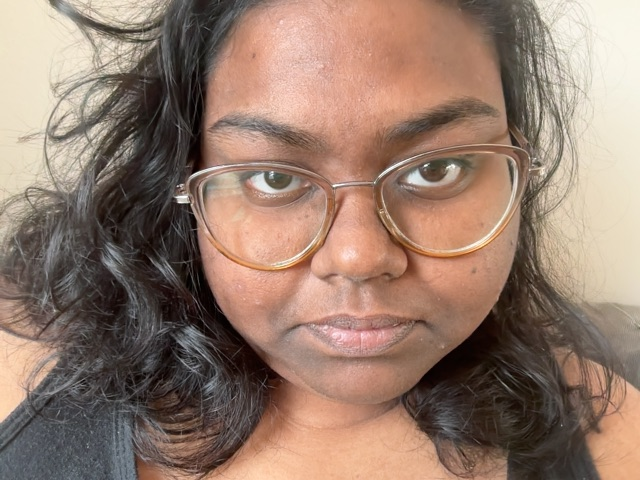

Exception encountered when calling Flatten.call().

'list' object has no attribute 'shape'

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 1, 1, 512), dtype=float32, sparse=False, name=keras_tensor_174>'],)
  • kwargs=<class 'inspect._empty'>


In [53]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image as PILImage
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import os

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return os.path.abspath(filename)

try:
    # Capture an image from the webcam using the take_photo function.
    filename = take_photo()
    print('Saved to {}'.format(filename))  # Print the filename where the image is saved.

    # Display the captured image.
    display(PILImage.open(filename))

    # Load the pre-trained emotion detection model.
    model = load_model('emotion_detection_model_vgg16_full.h5')

    # Define the emotion labels corresponding to the model's output classes.
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

    # Preprocess the captured image for model prediction.
    image = PILImage.open(filename)  # Open the saved image.
    image = image.convert('RGB')  # Ensure the image is in RGB format.
    image = image.resize((48, 48))  # Resize the image to match the input size expected by the model.
    image = img_to_array(image)  # Convert the image to a NumPy array.
    image = np.expand_dims(image, axis=0)  # Add an extra dimension to match the model's input shape (batch size, height, width, channels).
    image = image / 255.0  # Normalize the image pixel values to the range [0, 1].

    # Predict the emotion using the pre-trained model.
    prediction = model.predict(image)

    # Determine the emotion label with the highest prediction probability.
    emotion = emotion_labels[np.argmax(prediction)]

    # Print the detected emotion.
    print(f'Detected Emotion: {emotion}')

except Exception as err:
    # Handle any errors that occur during the process and print the error message.
    print(str(err))

In [54]:
from tensorflow.keras.applications import VGG16
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam

# Clear the session to avoid any contamination
from keras import backend as K
K.clear_session()

# Define the input shape
input_shape = (48, 48, 3)

# Input layer
input_layer = Input(shape=input_shape)

# Load the VGG16 model without the top classification layer
vgg16_base = VGG16(weights='imagenet', include_top=False, input_tensor=input_layer)

# Fine-tune the last few layers
for layer in vgg16_base.layers[:-4]:
    layer.trainable = False

# Add custom layers on top of the VGG16 base
x = Flatten()(vgg16_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(7, activation='softmax')(x)  # Assuming 7 emotion classes

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
try:
    model.summary()
except ValueError as e:
    print("Error during model summary:", e)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 7,212,551 (27.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [55]:
from keras.models import load_model  # Import the function to load a pre-trained Keras model.
from keras.preprocessing.image import img_to_array  # Import the function to convert an image to a NumPy array.
from PIL import Image as PILImage  # Import the Image class from the PIL library for image processing.
import numpy as np  # Import NumPy for numerical operations.

# Load the pre-trained emotion detection model.
try:
    model = load_model('emotion_detection_model_vgg16_full.h5')  # Load the model from the specified file.
    model.summary()  # Print the model summary to verify that the model has been loaded correctly.
except Exception as e:
    print("Error loading model:", e)  # Print an error message if the model fails to load.

# Define the emotion labels corresponding to the output classes of the model.
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Load and preprocess the image for prediction.
image_path = '/content/photo.jpg'  # Specify the path to the image file.
image = PILImage.open(image_path)  # Open the image using PIL.
image = image.convert('RGB')  # Convert the image to RGB format.
image = image.resize((48, 48))  # Resize the image to match the input size expected by the model (48x48 pixels).
image = img_to_array(image)  # Convert the image to a NumPy array.
image = np.expand_dims(image, axis=0)  # Add an extra dimension to match the model's input shape (batch size, height, width, channels).
image = image / 255.0  # Normalize the image pixel values to the range [0, 1].

# Predict the emotion using the pre-trained model.
try:
    prediction = model.predict(image)  # Perform the prediction.
    emotion = emotion_labels[np.argmax(prediction)]  # Determine the emotion label with the highest prediction probability.
    print(f'Detected Emotion: {emotion}')  # Print the detected emotion.
except Exception as e:
    print("Error during prediction:", e)  # Print an error message if there is an issue during prediction.

Error loading model: Exception encountered when calling Flatten.call().

'list' object has no attribute 'shape'

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 1, 1, 512), dtype=float32, sparse=False, name=keras_tensor_60>'],)
  • kwargs=<class 'inspect._empty'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
Detected Emotion: Angry
